In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
LOOK_BACK = 3

In [3]:
from crypto_feature_preprocess.domains.features_gen import calculate_rsi


In [4]:
import talib


In [5]:
# Use Plotly Express to plot the RSI
# then add a horizontal line at 70 and 30
import plotly.graph_objects as go


##  Load historical data

In [6]:
from cryptomarketdata.port.db_client import   get_data_db_client, Database_Type
from cryptomarketdata.utility import resample_timeframe
from crypto_feature_preprocess.domains.features_gen  import RSI_Feature
from datetime import datetime, timedelta

In [7]:
local_data_dir = "data"
local_data_dir = "../../crypto_market_data/data"
test_exchange = "kraken"
test_symbol = "ETHUSD"
from_time_ms:int = int(datetime(2022,1,1).timestamp()*1000)
to_time_ms:int = int(datetime(2023,3,1).timestamp()*1000)
LOOK_BACK:int = 3
rsi_window = 14

In [8]:
db_client = get_data_db_client(
        exchange=test_exchange, database_type=Database_Type.PARQUET, data_directory=local_data_dir
    )

2023-07-05 22:31:40,215 [INFO] Data stored in ../../crypto_market_data/data (db_client.py:35)
2023-07-05 22:31:40,216 [INFO] Use Parquet data set (db_client.py:41)
2023-07-05 22:31:40,218 [INFO] Using local file system (parquet_database.py:55)
2023-07-05 22:31:40,218 [INFO] Using local file system (parquet_database.py:55)


In [9]:
candles = db_client.get_candles(
    symbol=test_symbol, from_time=from_time_ms, to_time=to_time_ms
)
candles_15Min = resample_timeframe(data=candles, tf="15Min")

rsi = calculate_rsi(df_price=candles_15Min["close"],window=rsi_window)

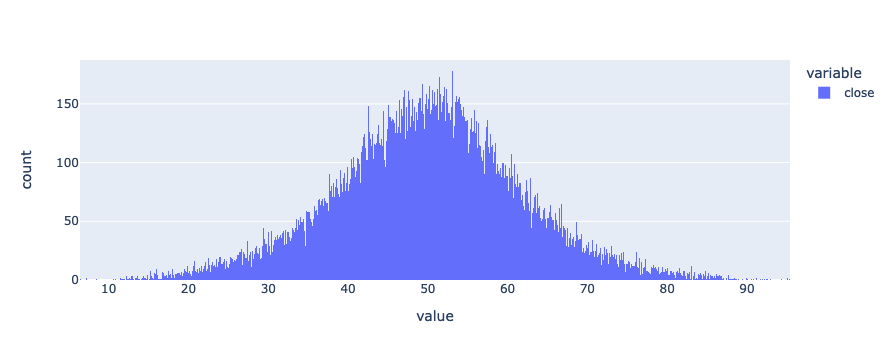

In [10]:
# Use plotly to plot histogram of rsi with 1000 bins
import plotly.express as px
fig = px.histogram(rsi, nbins=1000)
fig.show()

In [11]:
rsi_feature = RSI_Feature(
        df_price=candles_15Min["close"], dimension=LOOK_BACK, rsi_window=rsi_window,
    )

In [12]:
rsi_feature_array = rsi_feature.output_feature_array(normalize=True)

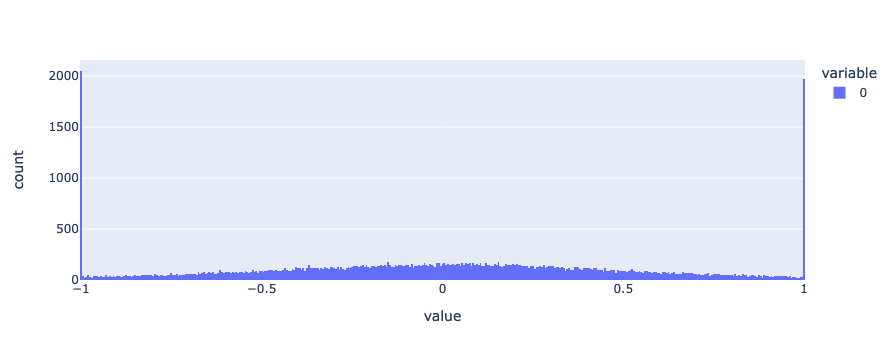

In [13]:
# Use plotly to plot histogram of rsi_feature_array[:,0] with 1000 bins
import plotly.express as px
fig = px.histogram(rsi_feature_array[:,0], nbins=1000)
fig.show()

In [14]:
rsi_feature_array


array([[-0.10417636,  0.52175416,  1.        ],
       [ 0.08980149, -0.10417636,  0.52175416],
       [-0.0271681 ,  0.08980149, -0.10417636],
       ...,
       [ 0.66391831,  0.46558893,  0.25760066],
       [ 0.56949409,  0.66391831,  0.46558893],
       [ 0.5847419 ,  0.56949409,  0.66391831]])

In [15]:
np.max(rsi_feature_array, -1)

array([1.        , 0.52175416, 0.08980149, ..., 0.66391831, 0.66391831,
       0.66391831])